# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as ss

In [3]:
student_data = pd.DataFrame({'StudentID': [i for i in range(1, 11)],
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
     'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
    })

In [4]:
student_data.head()

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4


Draw a dispersion diagram (scatter plot) for the data.

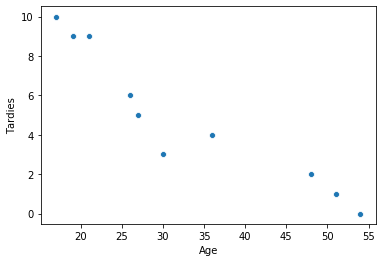

In [5]:
sns.scatterplot(x='Age', y='Tardies', data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

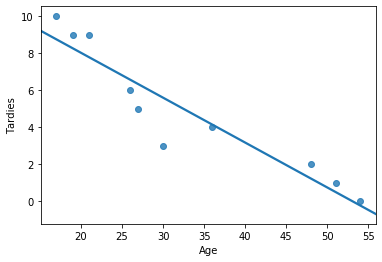

In [7]:
sns.regplot(x='Age', y='Tardies', data=student_data,ci=None)

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [9]:
ss.cov(student_data['Age'], student_data['Tardies'])

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

In [10]:
from scipy.stats import pearsonr

In [11]:
corr, p = pearsonr(student_data['Age'], student_data['Tardies'])

In [12]:
corr

-0.9391626886887122

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

### 0. pre-processing

In [13]:
# method 1: selecting variables
# independent variable
X = pd.DataFrame(data=student_data, 
                 columns=['Age'])

# dependent variable
y = pd.DataFrame(data=student_data, 
                 columns=['Tardies'])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

### 1. modeling

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# instantiate the LinearRegression class
linReg = LinearRegression()

In [20]:
# fit the model -- the algorithm will learn about the data pattern
linReg.fit(X_train, y_train)

### 2. prediction

In [21]:
# predict the y_test that we splitted
y_pred_test = linReg.predict(X_test) 

In [22]:
y_pred_test

array([[7.70032573],
       [5.61889251],
       [8.16286645]])

In [26]:
# Calculando o y_test de outra maneira:

def lm(col_x, col_y):
    # get numpy arrays from series
    X = col_x.values
    y = col_y.values
    
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=43)
    return(y_test)

In [27]:
lm(student_data['Age'], student_data['Tardies'])

array([9, 3, 9], dtype=int64)

### 3. evaluate

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

In [24]:
def lm_test(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rme = np.sqrt(mean_absolute_error(y_test, y_test))
    df_test = pd.DataFrame({'Mean Absolute Error':[mae], 
                           'Mean Squared Error': [mse],
                           'Root Mean Squared Error': [rme]})
    df_test = df_test.T
    df_test.columns = ['lm_test']
    return(df_test)

In [25]:
lm_test(y_test, y_pred_test)

# O objetivo dessa etapa é avaliar o RMSE - deve ser próximo a 0, para indicar que foi uma boa regressão

,lm_test
Mean Absolute Error,1.585233
Mean Squared Error,3.082848
Root Mean Squared Error,0.000000


### 4. predict

In [28]:
#Calculando para todo o dataframe:- dado futuro

# predict the values
y_pred = linReg.predict(X)

# include predictable tardies within the dataframe
student_data['pred_tardies'] = y_pred

In [29]:
student_data.head()

,StudentID,Age,Tardies,pred_tardies
0,1,17,10,8.625407
1,2,51,1,0.762215
2,3,27,5,6.312704
3,4,21,9,7.700326
4,5,36,4,4.231270


### 5. Interpret the results

y= mX + b

y: target variable
X: feature variables

In [32]:
# 1 único coeficiente: 1 variável explicativa (Age)
# coefficient, represented by 'b'
b = linReg.coef_
b

array([[-0.23127036]])

In [33]:
# intercept, represented by 'm'
m = linReg.intercept_
m

array([12.55700326])

* coefficient of -0.24: it means that for every unite of change in X (age), the change in y (tardie) is about 24% -- in a negative direction. 
* In other words: for every year of increasing in age, it will represent a decrease of 24% in tardies.

Text(0, 0.5, 'Tardies')

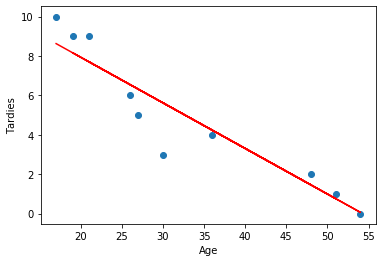

In [42]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Age')
plt.ylabel('Tardies')

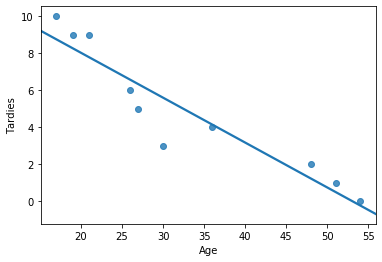

In [46]:
sns.regplot(x='Age', y='Tardies', data=student_data,ci=None)

# o regplot já plota a reta de regressão, mas não fornece informações adicionais. Para obtê-las, deve-se seguir 
# os passos anteriores.

### 6. Compare the results

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

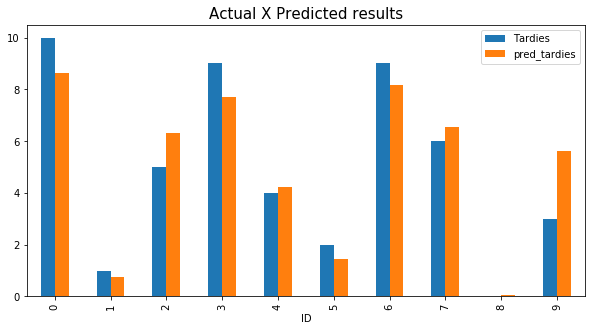

In [48]:
student_data[['Tardies', 'pred_tardies']].plot(kind='bar', figsize=(10,5))
plt.title('Actual X Predicted results', fontsize=15);
plt.xlabel('ID')
plt.show()

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [50]:
vehicles = pd.read_csv('vehicles.csv')

In [51]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [54]:
corr= vehicles.corr()

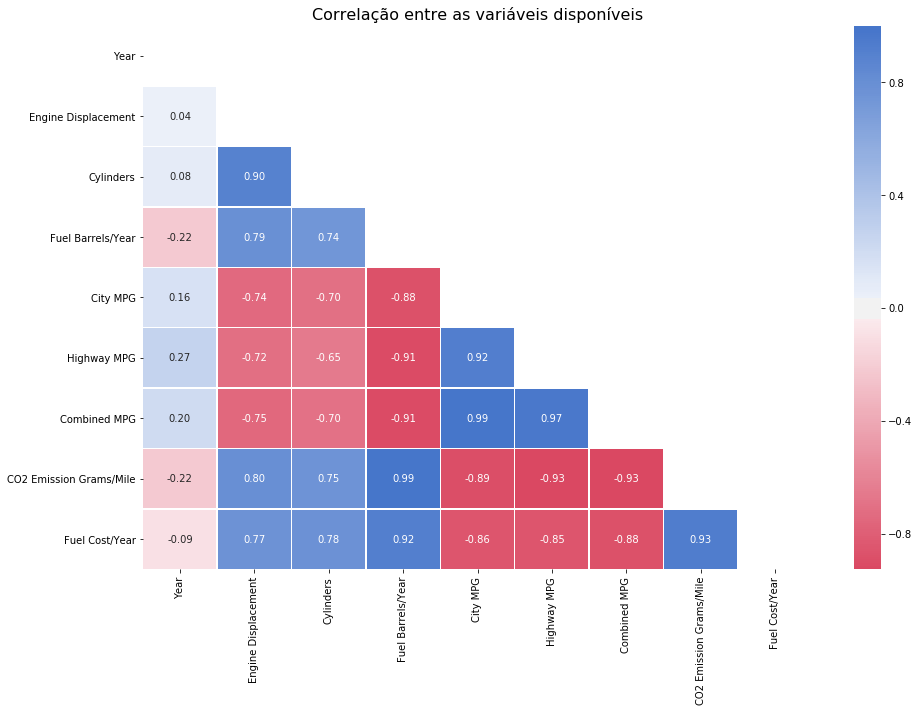

In [55]:
def correlation_matrix(corr, title=""):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    plt.subplots(figsize=(15, 10))
    cmap = sns.diverging_palette(6, 255, as_cmap=True)
    
    chart = sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5, annot=True, fmt='.2f')
    plt.title(title, fontsize=16)
    
    return chart

corr_plot = correlation_matrix(corr, title='Correlação entre as variáveis disponíveis')

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

### 0. pre-processing

In [60]:
X = pd.DataFrame(data=vehicles, 
                 columns=['Fuel Barrels/Year'])

# y: resposta
y = pd.DataFrame(data=vehicles, 
                 columns=['CO2 Emission Grams/Mile'])

In [57]:
from sklearn.model_selection import train_test_split

In [61]:
# dividindo entre treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

### 1. modeling

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
# instantiate the LinearRegression class
linReg = LinearRegression()

In [64]:
# fit the model -- the algorithm will learn about the data pattern
linReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 2. prediction

In [65]:
# predict the y_test that we splitted
y_pred_test = linReg.predict(X_test) 

### 3. evaluate

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
np.sqrt(mean_absolute_error(y_test, y_pred_test))

# O objetivo dessa etapa é avaliar o RMSE - deve ser próximo a 0, para indicar que foi uma boa regressão

1.9492592932923214

In [70]:
print(mean_squared_error(y_test, y_pred_test))
print(r2_score(y_test, y_pred_test))

226.42163956839337
0.9841076035221348


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [71]:
# 1 único coeficiente: 1 variável explicativa (Age)
# coefficient, represented by 'b'
b = linReg.coef_
b

array([[26.19755164]])

In [72]:
# intercept, represented by 'm'
m = linReg.intercept_
m

array([14.09636543])

* coeficiente of 26.20: para cada incremento em X, há uma variação de 26.20 vezes em y.

Text(0, 0.5, 'CO2 Emission Grams/Mile')

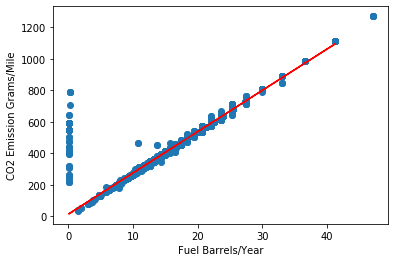

In [76]:
plt.scatter(X, y)
plt.plot(X_test, y_pred_test, color='red')
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('CO2 Emission Grams/Mile')

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [77]:
parties_data = pd.DataFrame({
    'Invited': [1,3,4,6,8,9,11,14],
     'Attended': [1,2,4,4,5,7,8,13]
    })

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

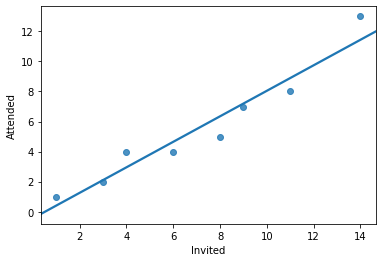

In [78]:
sns.regplot(x='Invited', y='Attended', data=parties_data,ci=None)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

### 0. pre-processing

In [79]:
X = pd.DataFrame(data=parties_data, 
                 columns=['Invited'])

# y: resposta
y = pd.DataFrame(data=parties_data, 
                 columns=['Attended'])

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
# dividindo entre treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

### 1. modeling

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
# instantiate the LinearRegression class
linReg = LinearRegression()

In [84]:
# fit the model -- the algorithm will learn about the data pattern
linReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 2. prediction

In [85]:
# predict the y_test that we splitted
y_pred_test = linReg.predict(X_test) 

In [86]:
np.sqrt(mean_absolute_error(y_test, y_pred_test))

# O objetivo dessa etapa é avaliar o RMSE - deve ser próximo a 0, para indicar que foi uma boa regressão

1.3278395591097747

In [87]:
print(mean_squared_error(y_test, y_pred_test))
print(r2_score(y_test, y_pred_test))

4.7042936288088555
0.7676892035156121


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [88]:
# 1 único coeficiente: 1 variável explicativa (Age)
# coefficient, represented by 'b'
b = linReg.coef_
b

array([[0.68421053]])

In [89]:
# intercept, represented by 'm'
m = linReg.intercept_
m

array([0.39473684])

* coeficiente of 0.68: para cada incremento em X, há uma variação de 0.68 vezes em y.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

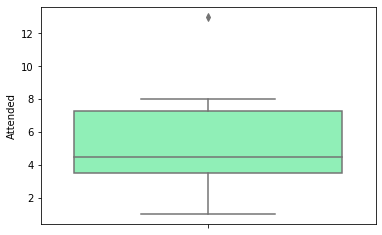

In [93]:
sns.boxplot(y="Attended", data=parties_data,palette='rainbow')

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [95]:
parties_data.drop([7], axis=0, inplace=True)

In [96]:
parties_data

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


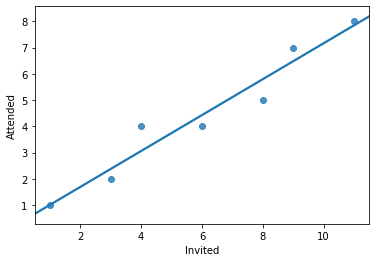

In [97]:
sns.regplot(x='Invited', y='Attended', data=parties_data,ci=None)

In [105]:
X = pd.DataFrame(data=parties_data, 
                 columns=['Invited'])

# y: resposta
y = pd.DataFrame(data=parties_data, 
                 columns=['Attended'])

In [106]:
# dividindo entre treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

In [107]:
# instantiate the LinearRegression class
linReg = LinearRegression()

In [108]:
# fit the model -- the algorithm will learn about the data pattern
linReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
# predict the y_test that we splitted
y_pred_test = linReg.predict(X_test) 

In [110]:
np.sqrt(mean_absolute_error(y_test, y_pred_test))

# O objetivo dessa etapa é avaliar o RMSE - deve ser próximo a 0, para indicar que foi uma boa regressão
# RMSE diminuiu, em comparação com o anterior

0.7146580974976898

In [111]:
print(mean_squared_error(y_test, y_pred_test))
print(r2_score(y_test, y_pred_test)) #R2 mais próximo de 1

0.27408351838608797
0.8781851029395165


In [112]:
# 1 único coeficiente: 1 variável explicativa (Age)
# coefficient, represented by 'b'
b = linReg.coef_
b

array([[0.6595092]])

In [113]:
# intercept, represented by 'm'
m = linReg.intercept_
m

array([0.43865031])